In [25]:
# Source:
# http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## <center>Analysis of free and paid apps ratings from Google Play Store</center> 
<center> <img src="https://cdn.pixabay.com/photo/2016/06/07/23/35/tablet-1442900_960_720.jpg" width="400" ></center> 
<link rel="stylesheet" href="css/theme/sky.css" id="theme">



<center>Andrei Zholud, Oct. 25 2019</center>


<h1> <center > How big is Google Play Store?
    </center></h1> 






<div class="container">
   <div class="col-lg-6 col-md-6 col-sm-12 col-xs-12">
       
       
2.9 millions apps, 30 % are paid apps

$25 billions in purchases last year 

   </div>
   <div class="col-lg-6 col-md-6 col-sm-12 col-xs-12">
      <img src="https://cdn.pixabay.com/photo/2016/10/12/16/32/smartphone-1735044_960_720.jpg" width="400">
   </div>
<div>


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [27]:
data_path='https://drive.google.com/uc?export=download&id=1MmuzYdcyjPWWsQcYoMddSkkSqfFFQX55'
#df = pd.read_csv('Google-Playstore-Full.csv') #if reading data from local file 
df = pd.read_csv(data_path)


In [28]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267052 entries, 0 to 267051
Data columns (total 15 columns):
App Name           267051 non-null object
Category           267051 non-null object
Rating             267052 non-null object
Reviews            267051 non-null object
Installs           267052 non-null object
Size               267052 non-null object
Price              267052 non-null object
Content Rating     267052 non-null object
Last Updated       267052 non-null object
Minimum Version    267051 non-null object
Latest Version     267049 non-null object
Unnamed: 11        18 non-null object
Unnamed: 12        3 non-null object
Unnamed: 13        2 non-null object
Unnamed: 14        1 non-null float64
dtypes: float64(1), object(14)
memory usage: 30.6+ MB


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1.20792e+06,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0,NaN,NaN,NaN,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2,NaN,NaN,NaN,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN


### Data cleaning
The dataset contains 267051 rows and 15 columns. After closer examination we can see that some columns (Ranking, Reviews) have numeric type, but Pandas loaded them as object (string) type. It happened because some  records are corrupted, and have string values instead of numeric in corresponding columns. Also dataset has four unnamed columns, which don't have any meaningful data, and can be removed.  Before starting working with this dataset, it show be cleaned. 

In [29]:
# dataset cleaning

# Selecting only rows in 'Rating' column which have only numeric values,
# and converting them into numeric values. Non- numeric rows are skipped
df = df[df['Rating'].astype(str).str.replace('.','').str.isnumeric()]
df['Rating'] = pd.to_numeric(df['Rating'])
df['Reviews'] = pd.to_numeric(df['Reviews'])

# 'Price' column contain price in dollars '$' fo paid apps
#  '$' should be remmoved before it converted to numeric type
df['Price']= df['Price'].apply(lambda x: float(x.replace('$',''))   )  
df['Installs']=df['Installs'].apply(lambda y: y.replace(',','').replace('+','')) 
df = df[df['Installs'].astype(str).str.isnumeric()]
df['Installs'] = pd.to_numeric(df['Installs'])

In [30]:
#removing all unnamed columns
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [31]:
df.head(2)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,5000000,Varies with device,0.0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,100000000,Varies with device,0.0,Everyone,"March 29, 2019",Varies with device,Varies with device


In [32]:
print(df.shape)
df.info()


(267034, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267034 entries, 0 to 267051
Data columns (total 11 columns):
App Name           267033 non-null object
Category           267034 non-null object
Rating             267034 non-null float64
Reviews            267034 non-null float64
Installs           267034 non-null int64
Size               267034 non-null object
Price              267034 non-null float64
Content Rating     267034 non-null object
Last Updated       267034 non-null object
Minimum Version    267033 non-null object
Latest Version     267031 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 24.4+ MB


After cleaning dataset contains 267034 rows and 11 columns. Now dataset have correct types for numeric columns, and does not have unnamed columns any more. Data are ready for further analysis. 

### Data sampling and Analysis

The goal of this project is to compare average rating of free and paid apps from Google Play Store. First of all apps should be split into two dataframes: one dataframe for free apps where price is 0, second one - for apps with non zero price. It worth to note that many apps have no or few reviews, making their average rating biased. Also that reviews could be test reviews or reviews made by developers, and their weight are high if total number of reviews is low. Therefore, only apps with 10 and more reviews will be used in further analysis.



In [33]:
# Createing two datasets: one for paid apps, and one for free apps
# Also not including apps with less than 10 reviews, becasue small number of reviews cannot give aquate averge ranking 
# those apps 
df_free = df[(df['Price'] == 0) & (df['Reviews']>=10)]
df_paid = df[(df['Price'] != 0) & (df['Reviews']>=10)]

In [34]:
print(f'Total free apps {df_free.shape[0]} with 10 and more reviews')
print(f'Total paid apps {df_paid.shape[0]} with 10 and more reviews')

Total free apps 208652 with 10 and more reviews
Total paid apps 9154 with 10 and more reviews


We can see that Google Play Store has significantly more free apps then paid apps. For analysis we choose random samples of identical size. 

In [35]:
df_free_s = df_free.sample(9000)
df_paid_s = df_paid.sample(9000)

<h1> <center> Is there a difference in rating between free and paid apps?</center></h1>

<center>
<img src = "https://cdn.pixabay.com/photo/2019/08/26/08/44/rating-4431148_960_720.jpg" width ="400"></center>

2008 as Android Market
prohections: 
in 2019 $29B
in 2020 $30B

## How free and paid apps are rated

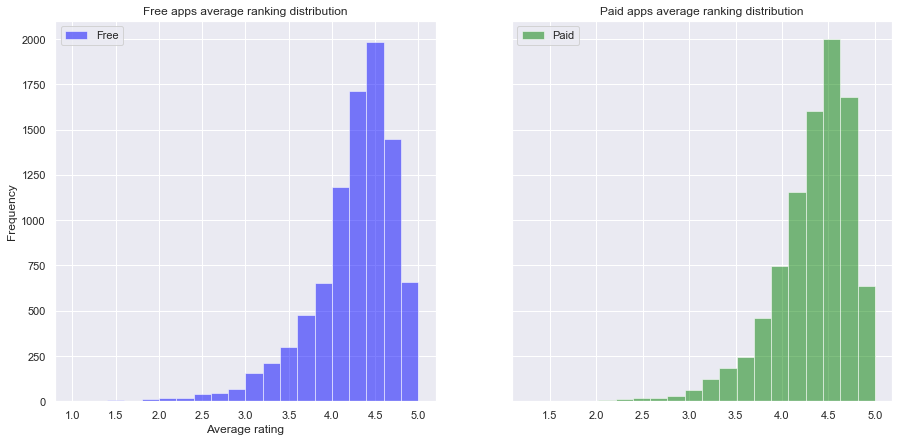

In [36]:
bins_num = 20
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharey=True, tight_layout=False)
axs[0].hist(df_free_s['Rating'],bins = bins_num, label = 'Free', alpha =0.5, color = 'blue')
axs[0].legend()
axs[0].set_title('Free apps average ranking distribution')
axs[1].hist(df_paid_s['Rating'],bins = bins_num, label = 'Paid',alpha = 0.5, color ='green')
axs[1].legend()
axs[1].set_title('Paid apps average ranking distribution')
axs[0].set_xlabel('Average rating')
axs[0].set_xlabel('Average rating')
axs[0].set_ylabel('Frequency');


From the quick glance on average ranting distribution histogram we can see that distributions are not normal, but  we need to test both samples for normality, and than decide what parametric or non-parametric statistical test to run to test the proposed hypothesis. 

In [37]:
print('Testing samples for nomality using describtion of samples')
st_free = stats.describe(df_free_s['Rating'])
st_paid = stats.describe(df_paid_s['Rating'])
print(f'Free apps stats: mean: {st_free.mean}; skewness {st_free.skewness}; kurtosis {st_free.kurtosis}')
print(f'Paid apps stats: mean: {st_paid.mean}; skewness {st_paid.skewness}; kurtosis {st_paid.kurtosis}')

Testing samples for nomality using describtion of samples
Free apps stats: mean: 4.252884491800556; skewness -1.5565942072783256; kurtosis 3.8862317063194407
Paid apps stats: mean: 4.333299077798778; skewness -1.448948955991042; kurtosis 3.494839877468433


Based of moderate skewness and high kurtosis we can conclude that both distributions are not normal, and non-parametric statistical tests should be used.  Free apps rating and paid apps rating are independent groups, and have no-normal distribution Mann-Whitney U test is the best choice for statistical analysis.

In [38]:
st_mw_test = stats.mannwhitneyu(df_free_s['Rating'],df_paid['Rating'])
print(f'Resutls of Mann-Whitney U test: \n p = {st_mw_test.pvalue}; \nstatistic: {st_mw_test.statistic}')

Resutls of Mann-Whitney U test: 
 p = 6.1191241662544444e-27; 
statistic: 37421424.5


In [39]:
#Finding statistics like standart deviation, means etc. for rating of free and paid apps;
st_descr_free = df_free_s['Rating'].describe() 
st_descr_paid = df_paid_s['Rating'].describe()

Very small p-value obtained from Mann-Whitney statistical test indicates significant difference between samples, that is why null hypothesis should be rejected.

## Results and Conclusion 

Statistical test showed significant difference in average rating for free and paid apps, this mean users evaluates these two groups of apps differently. If we look and compare average ranking for all free and all paid apps, we can see average ranking of paid apps is 4.33, which is higher than average ranking for free apps (4.25).  Higher average rating for paid apps may indicate better quality, and users are more satisfied with paid than with free apps. 


## Mean rating of free and paid apps

                 Rating:   4.25 free apps;  4.33 paid apps  


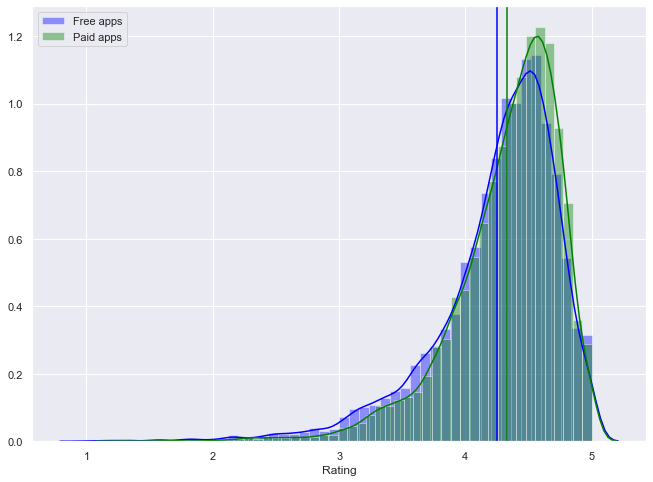

In [40]:
# Histogram of rating distribution of free and paid apps samples, vertincal lines represent average values
# each distribution
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df_free_s['Rating'], kde = True, label = 'Free apps', color ='blue')
sns.distplot(df_paid_s['Rating'], kde = True, label = 'Paid apps', color = 'green')
plt.legend()
plt.axvline(st_descr_free['mean'], color ='blue')
plt.axvline(st_descr_paid['mean'], color ='green');


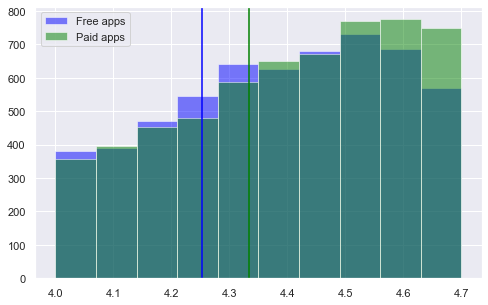

In [41]:
sns.set(rc={'figure.figsize':(8,5)})
plt.hist(df_free_s['Rating'],label = 'Free apps', color ='blue', alpha = 0.5, range = [4,4.7])
plt.hist(df_paid_s['Rating'],  label = 'Paid apps', color = 'green',alpha = 0.5,range = [4,4.7])
plt.legend()
plt.axvline(st_descr_free['mean'], color ='blue')
plt.axvline(st_descr_paid['mean'], color ='green');


Further analysis we can find what is the most popular category for paid and free apps looking into plots below:

## Conclusion

Paid apps at Google Play Store on average have higher rating than free apps 





## How free and paid apps are distributed by category

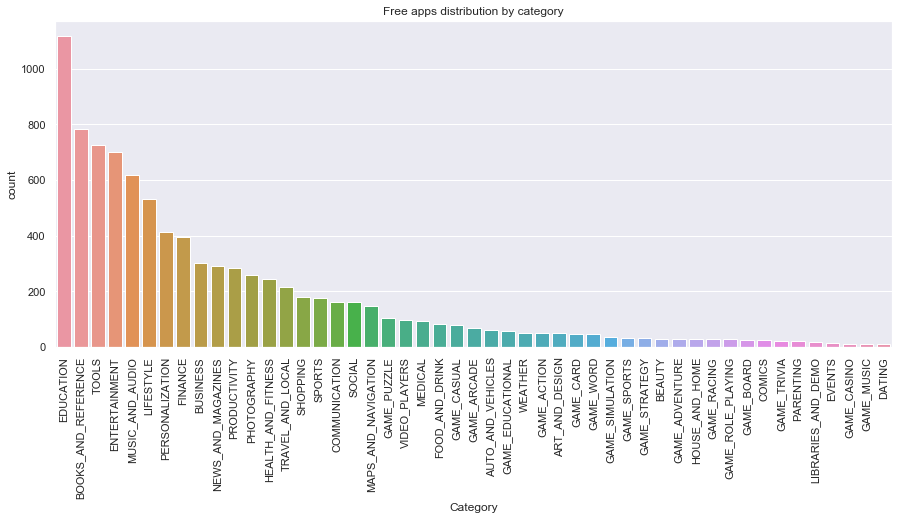

In [42]:
#Free apps categoty histogram
plt.figure(figsize=(15,6))
sns.countplot(x=df_free_s['Category'], order = df_free_s['Category'].value_counts().index)
plt.title('Free apps distribution by category')
plt.xticks(rotation=90);

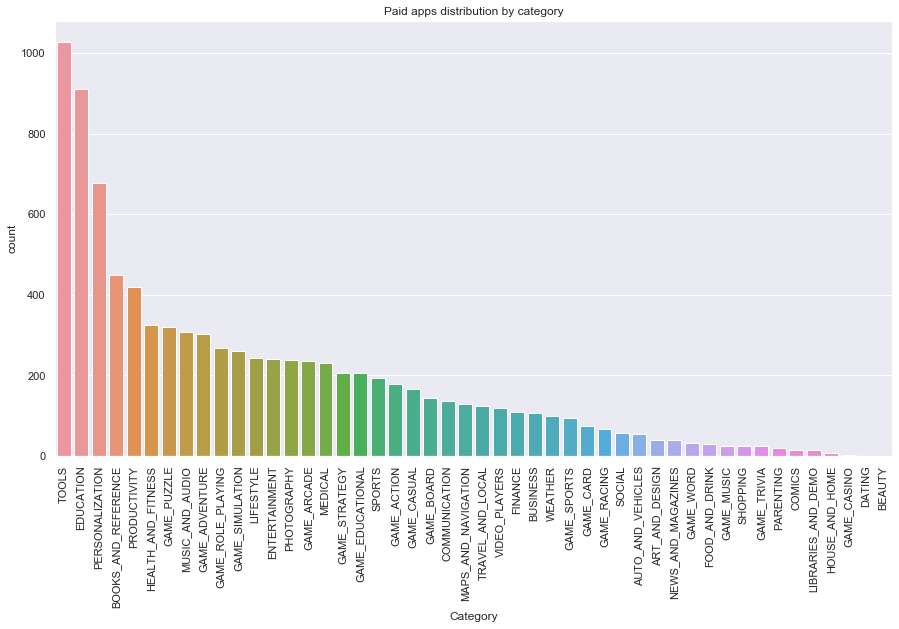

In [43]:
#Paid apps categoty histogram
plt.figure(figsize=(15,8))
sns.countplot(x=df_paid_s['Category'], order = df_paid_s['Category'].value_counts().index)
plt.title('Paid apps distribution by category')
plt.xticks(rotation=90);

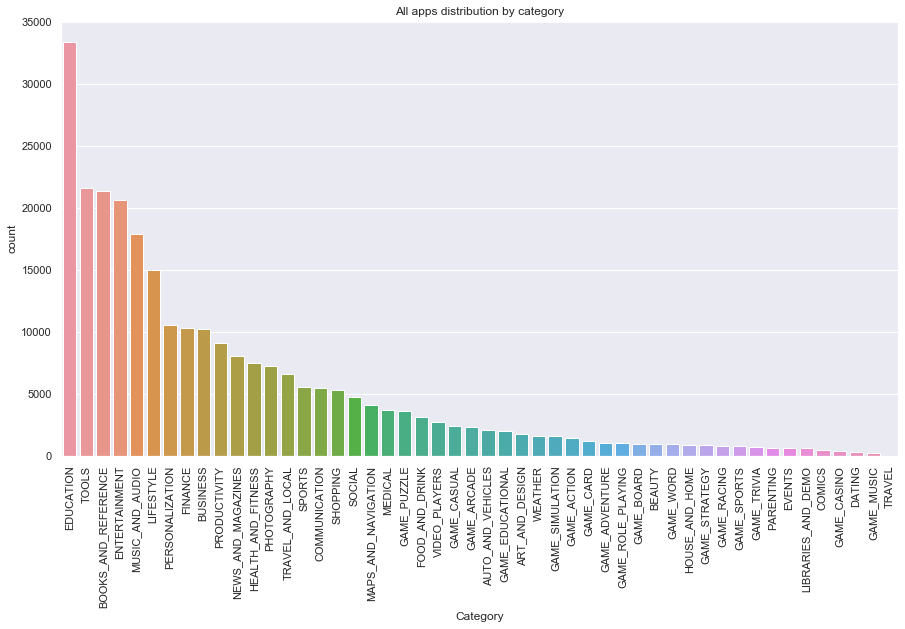

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Category'], order = df['Category'].value_counts().index)
plt.title('All apps distribution by category')
plt.xticks(rotation=90);

In [68]:
df_add = df.assign(total_revn = df['Price']*df['Installs'])
df_add_grp = df_add.groupby('Category')
df_agg = pd.DataFrame({'Number of elements': df_add_grp.size(), 
                       'Installs': df_add_grp['Installs'].sum(),
                       'Rating':df_add_grp['Rating'].mean(),
                       'Total revenue': df_add_grp['total_revn'].sum()})
#df_agg.sort_values(by='Installs', ascending =False);


df_add_grp_paid = df_paid_s.groupby('Category')
df_agg_paid = pd.DataFrame({'Number of elements': df_add_grp_paid.size(),
                            'Installs': df_add_grp_paid['Installs'].sum(),
                            'Rating':df_add_grp_paid['Rating'].mean()})

df_add_grp_free = df_free_s.groupby('Category')
df_agg_free = pd.DataFrame({'Number of elements': df_add_grp_free.size(), 
                            'Installs': df_add_grp_free['Installs'].sum(),
                            'Rating':df_add_grp_free['Rating'].mean()})



From histograms we can see the most free apps are in Education category and the most of paid of paid apps are in Tools category. Tools apps are made to perform specific function, and users download (buy) these apps with more clear understanding what they want to get from these tools. On the other hand Educational apps could be very diverse, as well as the quality of these apps. 

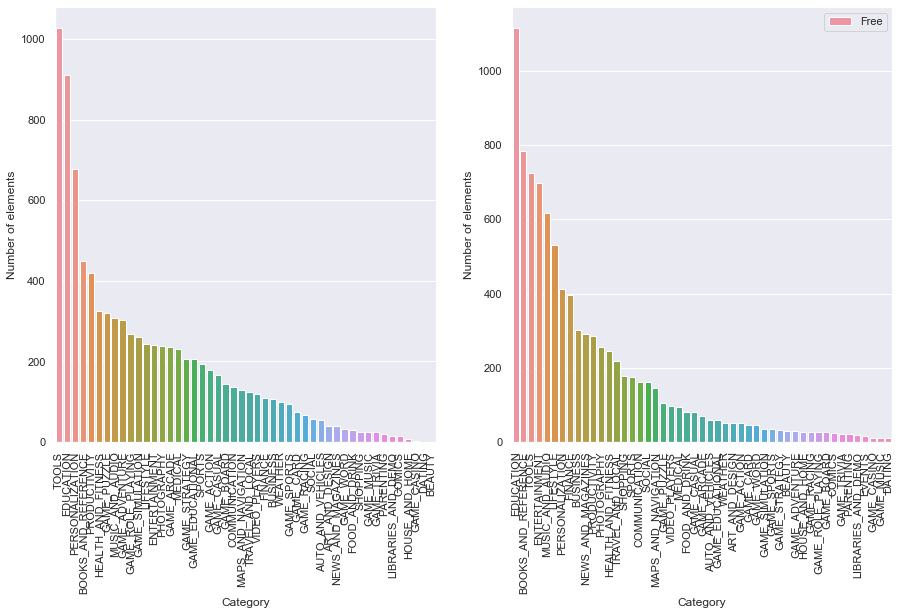

In [116]:
col_name='Number of elements'

fig, ax =plt.subplots(1,2,figsize = (15,8))
df_agg_paid.sort_values(by=col_name, inplace=True, ascending= False)
sns.barplot(x = df_agg_paid.index, y = df_agg_paid[col_name], ax = ax[0], label = 'Paid')
ax[0].set_xticklabels(labels=df_agg_paid.index, rotation=90)
df_agg_free.sort_values(by=col_name, inplace=True, ascending= False)
sns.barplot(x = df_agg_free.index, y = df_agg_free[col_name], ax=ax[1], label='Free')
plt.legend()
plt.xticks(rotation=90);


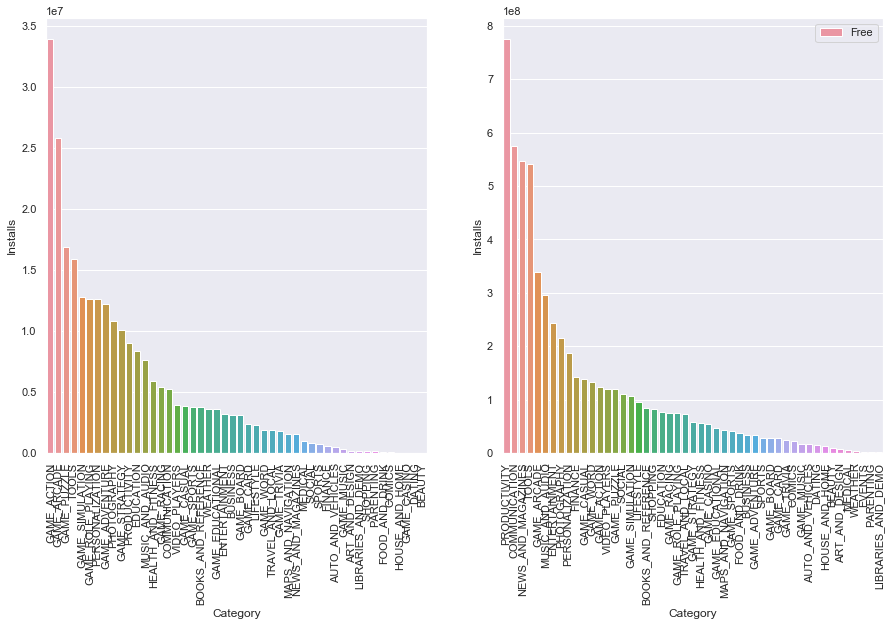

In [117]:
col_name='Installs'

fig, ax =plt.subplots(1,2,figsize = (15,8))
df_agg_paid.sort_values(by=col_name, inplace=True, ascending= False)
sns.barplot(x = df_agg_paid.index, y = df_agg_paid[col_name], ax = ax[0], label = 'Paid')
ax[0].set_xticklabels(labels=df_agg_paid.index, rotation=90)
df_agg_free.sort_values(by=col_name, inplace=True, ascending= False)
sns.barplot(x = df_agg_free.index, y = df_agg_free[col_name], ax=ax[1], label='Free')
plt.legend()
plt.xticks(rotation=90);

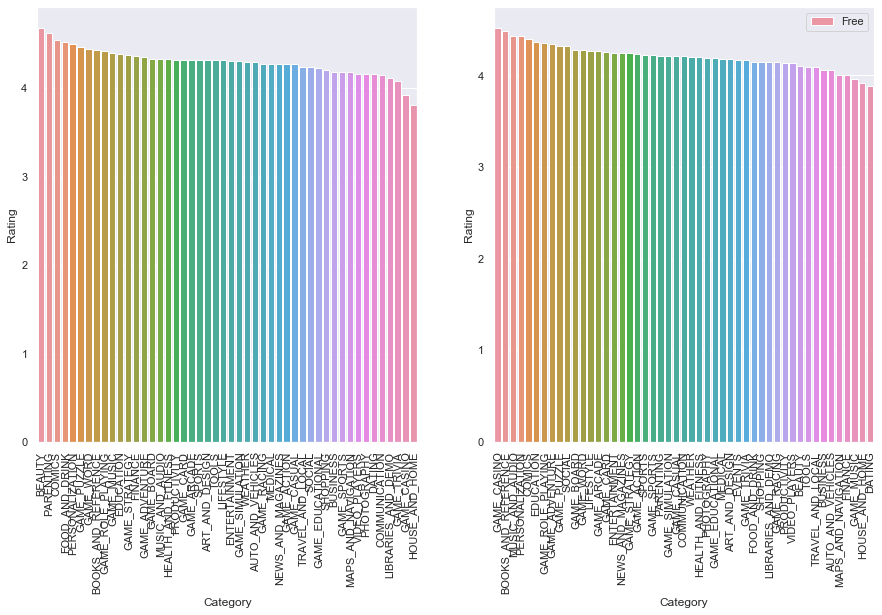

In [118]:
col_name='Rating'

fig, ax =plt.subplots(1,2,figsize = (15,8))
df_agg_paid.sort_values(by=col_name, inplace=True, ascending= False)
sns.barplot(x = df_agg_paid.index, y = df_agg_paid[col_name], ax = ax[0], label = 'Paid')
ax[0].set_xticklabels(labels=df_agg_paid.index, rotation=90)
df_agg_free.sort_values(by=col_name, inplace=True, ascending= False)
sns.barplot(x = df_agg_free.index, y = df_agg_free[col_name], ax=ax[1], label='Free')
plt.legend()
plt.xticks(rotation=90);